### Encryption Algorithm 

In [1]:
# dataset
text = """Dear Hiring Manager,

I am excited to submit my application for the Graduate Analyst position within AlphaSights’ Strategy & Analytics team. With a solid background in data science and quantitative analysis, coupled with my passion for problem-solving and delivering actionable insights, I am eager to contribute to the dynamic and innovative environment at AlphaSights.

AlphaSights’ mission to connect decision-makers to globally distributed knowledge resonates deeply with me. I am particularly drawn to your commitment to driving growth through data-driven performance measurement and analytically grounded decision-making. My academic background, including a Master’s in Data Science from the University of Essex and a Bachelor’s in Mathematics, has equipped me with robust analytical and quantitative skills that align perfectly with this mission.

During my tenure as a Data Scientist at PJST Global Services, I successfully extracted data from proprietary systems and performed comprehensive quantitative analyses. These efforts resulted in a 15% increase in quarterly revenue projections and optimized resource allocation. Leading a team to enhance SQL databases, I improved query speed by 38% and reduced weekly maintenance time by 10 hours. Additionally, I spearheaded a strategic initiative to optimize customer segmentation, reducing operational costs by 10% within eight months through streamlined targeted marketing efforts.

My role as a Technology Intern at Bright Network further honed my skills in presenting insights to senior leaders, utilizing data storytelling techniques to drive executive buy-in and inform strategic decisions. This experience, coupled with my ability to solve complex and unstructured business problems, demonstrates my proactive and meticulous approach to work—attributes that are essential in the fast-paced environment at AlphaSights.

In my academic projects, I have often collaborated with interdisciplinary teams to tackle real-world challenges. One such project involved working with a local startup to develop a predictive model that increased their customer retention by 20%. This project taught me the importance of clear communication and the ability to translate technical findings into actionable business strategies, skills that I am eager to bring to the Strategy & Analytics team at AlphaSights.

AlphaSights’ culture of innovation, collaboration, and high standards is truly inspiring. I am highly driven, detail-oriented, and possess strong interpersonal and presentation skills. My commitment to maintaining high standards and delivering meticulous work aligns perfectly with AlphaSights’ values.

Furthermore, I am intrigued by the opportunity to work within a team that thrives on intellectual curiosity and continuous learning. The fast-paced and high-stakes environment at AlphaSights is an ideal match for my ambition and desire to push the boundaries of what is possible through data analytics. I am particularly impressed by AlphaSights’ dedication to leveraging advanced analytics to provide clients with the most relevant and timely insights, a mission I am excited to support and enhance with my expertise.

I am enthusiastic about the opportunity to bring my expertise in data extraction, quantitative analysis, and problem-solving to AlphaSights. I am confident that my background, skills, and passion for data-driven decision-making will contribute to the continued growth and success of AlphaSights. I am eager to bring my knowledge and experience to your team, where I hope to make a meaningful impact by driving analytical excellence and supporting strategic initiatives. Thank you for considering my application. I look forward to discussing how I can contribute to your team.

Sincerely,
Johnson Philip
"""

### Individual Algorithm 

In [28]:
# Vigenère Cipher
def encrypt_vigenere(plaintext, key):
        # Convert the key to upper case
        key = key.upper()
        # Initialise an empty list to store the ciphertext and 'index_key' to 0
        ciphertext = []
        index_key = 0

        # Check through each character in the plaintext
        for character in plaintext.upper():
            # If the character is a letter
            if character.isalpha():
                # Calculate the shift value based on the key
                shift_vig = ord(key[index_key]) - ord('A')
                # Encrypt the character by shifting it and appending it
                encrypted_char = chr((ord(character) - ord('A') + shift_vig) % 26 + ord('A'))
                ciphertext.append(encrypted_char)
                # Update "index_key" to move to the next character in the key
                index_key = (index_key + 1) % len(key)
            else:
                # If it's not a letter, append the character as it is
                ciphertext.append(character)

        # Join the list into a string and return the ciphertext
        return ''.join(ciphertext)

# Example
print(encrypt_vigenere("DATA SCIENTIST", "JOHN"))

MOAN BQPRWHPFC


In [24]:
# Columnar Transposition Cipher
def encrypt_columnar_transposition(plaintext, key):
    # Remove empty spaces and replace them with 'X'
    plaintext_replaced = plaintext.replace(' ', 'X')
    
    # Create a list of indices based on the sorted key in an ascending order
    key_order = sorted(range(len(key)), key=lambda k: key[k])

    # Calculate the number of columns and rows for the grid
    columns_number = len(key)
    rows_number = (len(plaintext_replaced) + columns_number - 1) // columns_number  

    # Pad the plaintext to fill the grid completely with 'X'
    plaintext_pad = plaintext_replaced.ljust(rows_number * columns_number, 'X')

    # Create the grid from the padded plaintext
    columnar_grid = [plaintext_pad[i:i + columns_number] for i in range(0, len(plaintext_pad), columns_number)]

    # Generate the ciphertext by reading columns in the order defined by key_order
    ciphertext = ''.join(''.join(row[i] for row in columnar_grid) for i in key_order)

    return ciphertext

#Example
encrypt_columnar_transposition("DATA SCIENTIST", "JOHN")

'TCTXDXESAIIXASNT'

In [21]:
# Affine Cipher
def encrypt_affine(plaintext, a, b):
        # Ensure 'a' and 26 are coprime
        def gcd(a, b):
            while b != 0:
                a, b = b, a % b
            return a

        if gcd(a, 26) != 1:
            raise ValueError("Make sure a and 26 are coprime.")

        ciphertext = ''
        for character in plaintext:
            # Encrypt only alphabetic characters
            if character.isalpha():  
                if character.isupper():
                    x = ord(character) - ord('A')
                    encrypted_character = chr(((a * x + b) % 26) + ord('A'))
                else:
                    x = ord(character) - ord('a')
                    encrypted_character = chr(((a * x + b) % 26) + ord('a'))
                ciphertext += encrypted_character
            else:
                # Non-alphabetic characters remain unchanged
                ciphertext += character  

        return ciphertext

#Example
encrypt_affine("DATA SCIENTIST", 9, 14)

'PODO UGIYBDIUD'

In [22]:
# Rail Fence Cipher
def encrypt_rail_fence(plaintext, number_rails):
        # For each rail, initialise a list rails with empty strings 
        rails = [''] * number_rails
        # Initialise direction to 1 and rail to 0 to track the present rail and direction of movement
        direction = 1
        rail = 0

        # Check through each character in the plaintext
        for character in plaintext:
            # Append the character to the current rail
            rails[rail] += character
            # Update the rail index based on the direction
            rail += direction

            # Change direction when reaching the top or bottom rail
            if rail == 0 or rail == number_rails - 1:
                direction *= -1

        # Join the rails into a single string and return the ciphertext
        return ''.join(rails)

# Example
encrypt_rail_fence("DATA SCIENTIST", 4)

'DCSASIITT ETAN'

In [29]:
# PlayFair Cipher
def encrypt_playfair(plaintext, key):
    def matrix_for_playfair(key):
        # Initialise an empty list for the matrix and a set to keep track of used characters
        matrix = []
        used_chars = set()

        # Loop through each character in the key, and convert to uppercase
        for character in key.upper():
            # Add only the character if it hasn't been used and isn't 'J'
            if character not in used_chars and character != 'J':
                matrix.append(character)
                used_chars.add(character)

        # State the alphabet, excluding 'J' since it is usually combined with 'I'
        alphabet = 'ABCDEFGHIKLMNOPQRSTUVWXYZ'
        # Add remaining characters from the alphabet to the matrix if they haven't been used
        for character in alphabet:
            if character not in used_chars:
                matrix.append(character)
                used_chars.add(character)

        return matrix

    def find_position(matrix, character):
        # Replace 'J' with 'I' as per the Playfair cipher rules
        if character == 'J':
            character = 'I'
        # Find the index of the character in the matrix and return its row and column
        index = matrix.index(character)
        return index // 5, index % 5

    def preprocess_plaintext(plaintext):
        # Remove non-alphabetic characters and convert all to uppercase
        plaintext = ''.join(filter(str.isalpha, plaintext)).upper()  
        processed_text = []
        i = 0
        while i < len(plaintext):
            a = plaintext[i]
            if i + 1 < len(plaintext):
                b = plaintext[i + 1]
            else:
                # If the text length is odd, pad with 'X'
                b = 'X'  
            
            if a == b:
                # If a pair is identical, insert an 'X' between them
                processed_text.append(a)
                processed_text.append('X')
                i += 1
            else:
                # Otherwise, just add the pair to the processed text
                processed_text.append(a)
                processed_text.append(b)
                i += 2

        # If the processed text ends up with an odd length, pad the final character with 'X'
        if len(processed_text) % 2 != 0:
            processed_text.append('X')
        
        return processed_text

    # Generate the Playfair matrix using the key
    matrix = matrix_for_playfair(key)
    # Preprocess the plaintext to prepare it for encryption
    processed_text = preprocess_plaintext(plaintext)
    ciphertext = []

    i = 0
    while i < len(processed_text):
        a = processed_text[i]
        b = processed_text[i + 1]

        # Find the positions of both characters in the matrix
        row_a, col_a = find_position(matrix, a)
        row_b, col_b = find_position(matrix, b)

        if row_a == row_b:
            # If the characters are in the same row, shift right 
            ciphertext.append(matrix[row_a * 5 + (col_a + 1) % 5])
            ciphertext.append(matrix[row_b * 5 + (col_b + 1) % 5])
        elif col_a == col_b:
            # If the characters are in the same column, shift down 
            ciphertext.append(matrix[((row_a + 1) % 5) * 5 + col_a])
            ciphertext.append(matrix[((row_b + 1) % 5) * 5 + col_b])
        else:
            # If neither row nor column matches, swap columns
            ciphertext.append(matrix[row_a * 5 + col_b])
            ciphertext.append(matrix[row_b * 5 + col_a])

        i += 2

    # Return the encrypted text as a single string
    return ''.join(ciphertext)

# Example 
encrypt_playfair("DATA SCIENTIST", "JOHN")

'FHYFQELCASLQSY'

### Combined Cipher

In [30]:
def combined_cipher(plaintext, key_vigenere, key_transposition, affine_a, affine_b, rail_fence_rails, key_playfair):
    # Step 1: Vigenère Cipher
    def encrypt_vigenere(plaintext, key):
        # Convert the key to upper case
        key = key.upper()
        # Initialise an empty list to store the ciphertext and 'index_key' to 0
        ciphertext = []
        index_key = 0

        # Check through each character in the plaintext
        for character in plaintext.upper():
            # If the character is a letter
            if character.isalpha():
                # Calculate the shift value based on the key
                shift_vig = ord(key[index_key]) - ord('A')
                # Encrypt the character by shifting it and appending it
                encrypted_char = chr((ord(character) - ord('A') + shift_vig) % 26 + ord('A'))
                ciphertext.append(encrypted_char)
                # Update "index_key" to move to the next character in the key
                index_key = (index_key + 1) % len(key)
            else:
                # If it's not a letter, append the character as it is
                ciphertext.append(character)

        # Join the list into a string and return the ciphertext
        return ''.join(ciphertext)

    # Step 2: Columnar Transposition Cipher
    def encrypt_columnar_transposition(plaintext, key):
        # Remove empty spaces and replace them with 'X'
        plaintext_replaced = plaintext.replace(' ', 'X')
        
        # Create a list of indices based on the sorted key in ascending order
        key_order = sorted(range(len(key)), key=lambda k: key[k])

        # Calculate the number of columns and rows for the grid
        columns_number = len(key)
        rows_number = (len(plaintext_replaced) + columns_number - 1) // columns_number  

        # Pad the plaintext to fill the grid completely with 'X'
        plaintext_pad = plaintext_replaced.ljust(rows_number * columns_number, 'X')

        # Create the grid from the padded plaintext
        columnar_grid = [plaintext_pad[i:i + columns_number] for i in range(0, len(plaintext_pad), columns_number)]

        # Generate the ciphertext by reading columns in the order defined by key_order
        ciphertext = ''.join(''.join(row[i] for row in columnar_grid) for i in key_order)

        return ciphertext

    # Step 3: Affine Cipher
    def encrypt_affine(plaintext, a, b):
        # Ensure 'a' and 26 are coprime
        def gcd(a, b):
            while b != 0:
                a, b = b, a % b
            return a

        if gcd(a, 26) != 1:
            raise ValueError("Make sure a and 26 are coprime.")

        ciphertext = ''
        for character in plaintext:
            # Encrypt only alphabetic characters
            if character.isalpha():  
                if character.isupper():
                    x = ord(character) - ord('A')
                    encrypted_character = chr(((a * x + b) % 26) + ord('A'))
                else:
                    x = ord(character) - ord('a')
                    encrypted_character = chr(((a * x + b) % 26) + ord('a'))
                ciphertext += encrypted_character
            else:
                # Non-alphabetic characters remain unchanged
                ciphertext += character  

        return ciphertext

    # Step 4: Rail Fence Cipher
    def encrypt_rail_fence(plaintext, number_rails):
        # For each rail, initialise a list 'rails' with empty strings 
        rails = [''] * number_rails
        # Initialise direction to 1 and rail to 0 to track the current rail and direction of movement
        direction = 1
        rail = 0

        # Check through each character in the plaintext
        for character in plaintext:
            # Append the character to the current rail
            rails[rail] += character
            # Update the rail index based on the direction
            rail += direction

            # Change direction when reaching the top or bottom rail
            if rail == 0 or rail == number_rails - 1:
                direction *= -1

        # Join the rails into a single string and return the ciphertext
        return ''.join(rails)

    # Step 5: Playfair Cipher
    def encrypt_playfair(plaintext, key):
        def matrix_for_playfair(key):
            matrix = []
            used_chars = set()

            for character in key.upper():
                if character not in used_chars and character != 'J':
                    matrix.append(character)
                    used_chars.add(character)

            alphabet = 'ABCDEFGHIKLMNOPQRSTUVWXYZ'
            for character in alphabet:
                if character not in used_chars:
                    matrix.append(character)
                    used_chars.add(character)

            return matrix

        def find_position(matrix, character):
            if character == 'J':
                character = 'I'
            index = matrix.index(character)
            return index // 5, index % 5

        def preprocess_plaintext(plaintext):
            plaintext = ''.join(filter(str.isalpha, plaintext)).upper()  # Remove non-alphabetic characters and convert to uppercase
            processed_text = []
            i = 0
            while i < len(plaintext):
                a = plaintext[i]
                if i + 1 < len(plaintext):
                    b = plaintext[i + 1]
                else:
                    b = 'X'
                
                if a == b:
                    processed_text.append(a)
                    processed_text.append('X')
                    i += 1
                else:
                    processed_text.append(a)
                    processed_text.append(b)
                    i += 2

            if len(processed_text) % 2 != 0:
                processed_text.append('X')
            
            return processed_text

        matrix = matrix_for_playfair(key)
        processed_text = preprocess_plaintext(plaintext)
        ciphertext = []

        i = 0
        while i < len(processed_text):
            a = processed_text[i]
            b = processed_text[i + 1]

            row_a, col_a = find_position(matrix, a)
            row_b, col_b = find_position(matrix, b)

            if row_a == row_b:
                ciphertext.append(matrix[row_a * 5 + (col_a + 1) % 5])
                ciphertext.append(matrix[row_b * 5 + (col_b + 1) % 5])
            elif col_a == col_b:
                ciphertext.append(matrix[((row_a + 1) % 5) * 5 + col_a])
                ciphertext.append(matrix[((row_b + 1) % 5) * 5 + col_b])
            else:
                ciphertext.append(matrix[row_a * 5 + col_b])
                ciphertext.append(matrix[row_b * 5 + col_a])

            i += 2

        return ''.join(ciphertext)

    # Process the plaintext through each stage
    first_stage = encrypt_vigenere(plaintext, key_vigenere)
    second_stage = encrypt_columnar_transposition(first_stage, key_transposition)
    third_stage = encrypt_affine(second_stage, affine_a, affine_b)
    fourth_stage = encrypt_rail_fence(third_stage, rail_fence_rails)
    final_stage = encrypt_playfair(fourth_stage, key_playfair)

    # Return the final ciphertext
    return final_stage

# Example usage:
plaintext = text
final_ciphertext = combined_cipher(plaintext, "OLUWASEUN", "PHILIP", 17, 20, 5, "TECHnology")
print("The ciphertext is")
print()
print(final_ciphertext)

The ciphertext is

QSXWEVXLPCXPPMPWRDNYVNYWAWGXPKWZXDHDKLDSNLHMTBIHDXCRXKSXWNYXPWUIWNZWYDFTRWZLZDQHLPELTQZWNILUVEKZXEIUQRTMKZAIPWUAVTDWRYLAMDUPDZHDQIQOLMWZUPEVNFLZAUVENZDXXERWUQZPOCTMUHRGTDXPNXLBBHSNKBDGRUPBVHPZKFCVCURYRKAWULQHMCQMYHYRZNXPWZWZKKLWYHEXNMOUGCHVTLXWVWCLSNEDZPLUTQIZSAUELELGINZPVBXKOSNYNWAKTPRGXFMILWZLULMNMWRBICMYVEOVEZSWGXZWYQXPHLWXMFSUASFZEBQTWETXZWCDGRMRFCWDPCXYNHUPXLHBXUIUEXWURPWEUQWUDXBPOVWZXDVNWMNSEVAWUIUARFEPBRVENSSVPTPWHBWMXRMXWZEPEZPTUTTHXBBXLUXEFHKQFELXODHTAHHSTXHVCTNRDRRGDXPDZWCVUTPUDISQQVCXLPXDUKDXRZRKYXLUAXUXXPEWQPAGWUYZSLVBOIMGQVLVDUEWIVHCXPHQDZDZSFYNULPGNBVIPSBOZDQEKBKKWCWZXDICHOZDWZWPODGWFMWZWZXLDXZQTAIZBZPZELZLXQXSCNCGNQFBZSOZUHBYWKAVVXDRUWBHELVTPFUCPZNWTGDXWZUEMZWZZEUBDZEPZPWELXUEZOGWQETQKGEVHEQPPUYBVTNKZSEUOGCMDSFXDXRUUKGISOUHONWUVWMUSVUGABFRVGDHFUWHMSZZWIPXYOQCHKCWRAQOFXEWNAIRHWTQKMOIIOFHVAZWTPEZRUSUNMMBULRNLWBXPVRNBRZHFUNUZEELACDZFNBYZDOSBKUTQMPXUILQDBITXVEZEWSALWKZEZUYYGNVULZFPEIHOXKSIDYPRNVWDEIKWDEPYUWZZOYIVWBXPUROUYULULLZBKDYNDSUYHAXWZULGEHWHGMLDWDRU

### Statistical Analysis

In [32]:
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import math

In [33]:
def frequency_analysis(text):
    # Remove non-alphabetic characters and convert to uppercase
    text = ''.join(filter(str.isalpha, text)).upper()
    
    # Count frequency of each letter
    frequency = Counter(text)
    total_letters = sum(frequency.values())
    
    # Calculate the frequency percentage of each letter
    frequency_percentage = {char: (count / total_letters) * 100 for char, count in frequency.items()}
    
    return frequency_percentage, total_letters


# Perform frequency analysis on the ciphertext
observed_frequency, total_observed = frequency_analysis(final_ciphertext)
print("Observed Frequencies of the ciphertext:")
print()
print(observed_frequency)
print()
print("Total Letters Observed in ciphertext:")
print()
print(total_observed)

Observed Frequencies of the ciphertext:

{'Q': 2.4146981627296586, 'S': 2.5721784776902887, 'X': 6.351706036745407, 'W': 8.68766404199475, 'E': 5.669291338582677, 'V': 4.094488188976378, 'L': 5.695538057742782, 'P': 5.013123359580052, 'C': 2.4146981627296586, 'M': 2.8608923884514437, 'R': 3.674540682414698, 'D': 5.065616797900263, 'N': 3.149606299212598, 'Y': 2.9658792650918633, 'A': 2.8871391076115485, 'G': 2.5459317585301835, 'K': 3.0971128608923886, 'Z': 7.664041994750656, 'H': 3.543307086614173, 'T': 3.0708661417322833, 'B': 3.0183727034120733, 'I': 2.7821522309711284, 'U': 6.010498687664042, 'F': 2.6509186351706036, 'O': 2.099737532808399}

Total Letters Observed in ciphertext:

3810


In [34]:
text
observed_frequency_plaintext, total_observed_p = frequency_analysis(text)
print("Observed Frequencies of the plaintext:")
print()
print(observed_frequency_plaintext)
print("Total Letters Observed in plaintext:")
print()
print(total_observed_p)

Observed Frequencies of the plaintext:

{'D': 3.97456279809221, 'E': 9.697933227344992, 'A': 9.252782193958664, 'R': 5.627980922098569, 'H': 3.5930047694753573, 'I': 9.634340222575517, 'N': 7.599364069952305, 'G': 2.670906200317965, 'M': 3.2114467408585057, 'X': 0.3815580286168521, 'C': 3.783783783783784, 'T': 9.98410174880763, 'O': 6.200317965023848, 'S': 6.613672496025437, 'U': 2.7027027027027026, 'B': 1.3036565977742447, 'Y': 2.1939586645469, 'P': 2.6073131955484894, 'L': 4.324324324324325, 'F': 0.985691573926868, 'W': 0.985691573926868, 'K': 0.7949125596184419, 'Q': 0.2861685214626391, 'V': 1.3036565977742447, 'J': 0.19077901430842606, 'Z': 0.09538950715421303}
Total Letters Observed in plaintext:

3145


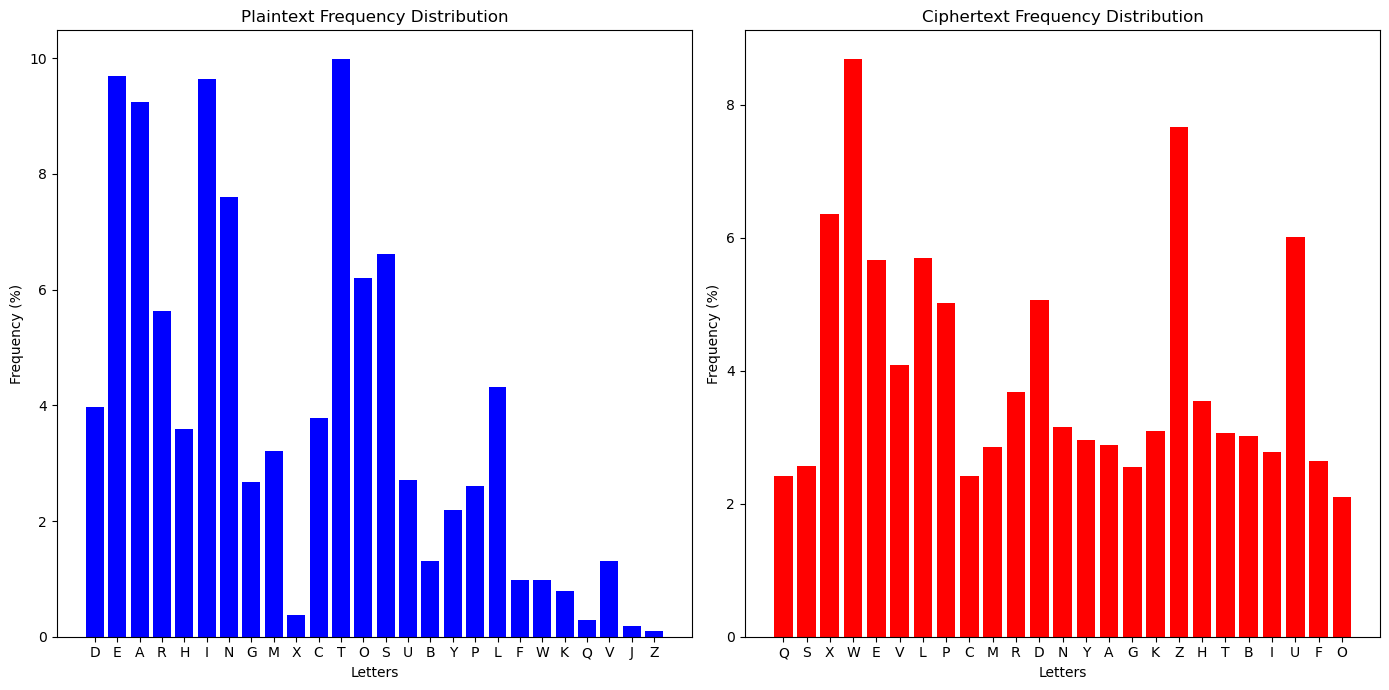

In [35]:
def plot_frequencies(plaintext_freq, ciphertext_freq):
    plt.figure(figsize=(14, 7))
    
    # Plot of plaintext frequencies
    plt.subplot(1, 2, 1)
    plt.bar(plaintext_freq.keys(), plaintext_freq.values(), color='blue')
    plt.title('Plaintext Frequency Distribution')
    plt.xlabel('Letters')
    plt.ylabel('Frequency (%)')

    # Plot of ciphertext frequencies
    plt.subplot(1, 2, 2)
    plt.bar(ciphertext_freq.keys(), ciphertext_freq.values(), color='red')
    plt.title('Ciphertext Frequency Distribution')
    plt.xlabel('Letters')
    plt.ylabel('Frequency (%)')

    plt.tight_layout()
    plt.show()

# Plot the frequency distributions
plot_frequencies(observed_frequency_plaintext, observed_frequency)

In [36]:
def calculate_expected_frequencies(total_observed, expected_percentage):
    # Calculate expected frequencies based on the observed total
    expected_freq = {char: total_observed * (freq / 100) for char, freq in expected_percentage.items()}
    return expected_freq

# Expected frequencies for English letters (percentage)
expected_freq_english = {
    'A': 8.17, 'B': 1.49, 'C': 2.78, 'D': 4.25, 'E': 12.70, 'F': 2.23, 'G': 2.02, 
    'H': 6.09, 'I': 6.97, 'J': 0.15, 'K': 0.77, 'L': 4.03, 'M': 2.41, 'N': 6.75, 
    'O': 7.51, 'P': 1.93, 'Q': 0.10, 'R': 5.99, 'S': 6.33, 'T': 9.06, 'U': 2.76, 
    'V': 0.98, 'W': 2.36, 'X': 0.15, 'Y': 1.97, 'Z': 0.07
}

# Calculate expected frequencies based on the observed total in the ciphertext
expected_frequency = calculate_expected_frequencies(total_observed, expected_freq_english)
print("Expected Frequencies:")
print()
print(expected_frequency)

Expected Frequencies:

{'A': 311.277, 'B': 56.769, 'C': 105.91799999999999, 'D': 161.925, 'E': 483.87, 'F': 84.96300000000001, 'G': 76.962, 'H': 232.029, 'I': 265.557, 'J': 5.715, 'K': 29.337, 'L': 153.543, 'M': 91.821, 'N': 257.175, 'O': 286.13100000000003, 'P': 73.53299999999999, 'Q': 3.81, 'R': 228.219, 'S': 241.17299999999997, 'T': 345.186, 'U': 105.15599999999999, 'V': 37.338, 'W': 89.916, 'X': 5.715, 'Y': 75.057, 'Z': 2.6670000000000003}


In [37]:
def chi_square_test(observed_freq, expected_freq):
    # Extract values from the dictionaries
    observed_values = [observed_freq.get(char, 0) for char in expected_freq]
    expected_values = [expected_freq[char] for char in expected_freq]
    
    # Adjusting observed values to match the total of expected values
    observed_total = sum(observed_values)
    expected_total = sum(expected_values)
    scaling_factor = observed_total / expected_total
    adjusted_expected_values = [value * scaling_factor for value in expected_values]
    
    # Perform chi-square test
    chi_square, p_value = stats.chisquare(observed_values, adjusted_expected_values)
    return chi_square, p_value

# Perform chi-square test
chi_square, p_value = chi_square_test(observed_frequency, expected_frequency)
print(f"Chi-Square: {chi_square}, p-value: {p_value}")

# Interpretation of results
degrees_of_freedom = len(expected_freq_english) - 1
critical_value = stats.chi2.ppf(0.95, degrees_of_freedom)
print(f"Critical Value (95% confidence): {critical_value}")

if chi_square > critical_value:
    print("The difference between the observed and expected frequencies is statistically significant.")
else:
    print("The difference between the observed and expected frequencies is not statistically significant.")


Chi-Square: 1203.933791780449, p-value: 2.5487242933163227e-238
Critical Value (95% confidence): 37.65248413348277
The difference between the observed and expected frequencies is statistically significant.


In [38]:
sum(observed_frequency.values())

100.0

In [39]:
sum(expected_frequency.values())

3810.7619999999997

### Entropy Calculation

In [40]:
def calculate_entropy(frequency):
    total = sum(frequency.values())
    entropy = -sum((count / total) * math.log2(count / total) for count in frequency.values() if count > 0)
    return entropy

In [41]:
# Calculate entropy
plaintext_entropy = calculate_entropy(observed_frequency_plaintext)
ciphertext_entropy = calculate_entropy(observed_frequency)

print(f"Plaintext Entropy: {plaintext_entropy}")
print()
print(f"Ciphertext Entropy: {ciphertext_entropy}")

Plaintext Entropy: 4.186901809852984

Ciphertext Entropy: 4.5196768235974165


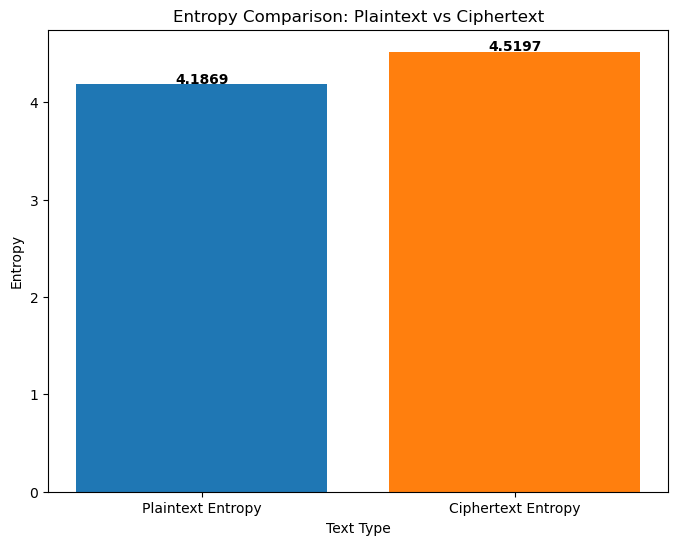

In [42]:
# My entropy values 
plaintext_entropy = 4.186901809852984
ciphertext_entropy = 4.5196768235974165

# Labels for the bars
labels = ['Plaintext Entropy', 'Ciphertext Entropy']

# Entropy values
entropy_values = [plaintext_entropy, ciphertext_entropy]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, entropy_values, color=['#1f77b4', '#ff7f0e'])

# Add title and labels
plt.title('Entropy Comparison: Plaintext vs Ciphertext')
plt.ylabel('Entropy')
plt.xlabel('Text Type')

# Annotate the bars with the entropy values
for i, v in enumerate(entropy_values):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')

In [43]:
def index_of_coincidence(text):
    frequencies = Counter(text)
    N = sum(frequencies.values())
    ic = sum(n * (n - 1) for n in frequencies.values()) / (N * (N - 1))
    return ic

ic_plaintext_value = index_of_coincidence(observed_frequency_plaintext)
ic_ciphertext_value = index_of_coincidence(observed_frequency)


print(f"Index of Coincidence for Plaintext: {ic_plaintext_value}")
print()
print(f"Index of Coincidence for Ciphertext: {ic_ciphertext_value}")


Index of Coincidence for Plaintext: 0.05536462386738267

Index of Coincidence for Ciphertext: 0.03799828250610486


In [44]:
# IC values and typical IC value for standard English text
ic_plaintext = 0.05536462386738267
ic_ciphertext = 0.03799828250610486
ic_standard_english = 0.068  

# Create a dictionary with the IC values
data = {
    "Text Type": ["Plaintext", "Ciphertext", "Standard English"],
    "Index of Coincidence (IC)": [ic_plaintext, ic_ciphertext, ic_standard_english]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Display the table
print(df)

          Text Type  Index of Coincidence (IC)
0         Plaintext                   0.055365
1        Ciphertext                   0.037998
2  Standard English                   0.068000
